 POLYNOMIAL REGRESSION: UNDERSTANDING MODEL COMPLEXITY

All libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


 GENERATING SYNTHETIC HOUSE PRICE DATASET

Dataset Information:
  Number of houses: 100
  Feature: House size (square feet)
  Target: House price (dollars)
  Size range: 517 - 3461 sq ft
  Price range: $112,207 - $1,829,262

Data Split:
  Training samples: 80
  Test samples: 20

 DATA VISUALIZATION


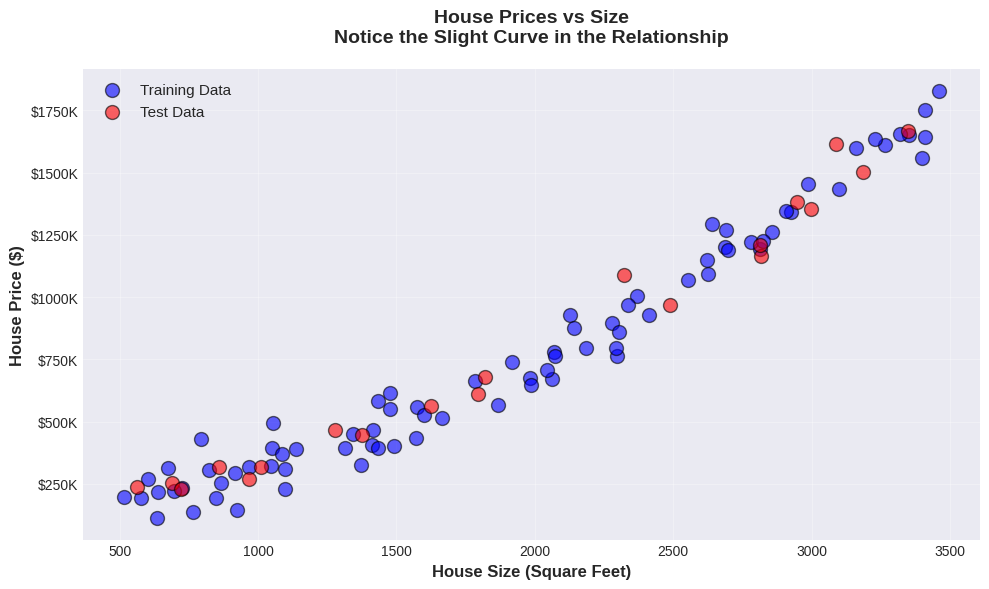


✓ Data visualization saved as 'house_data_distribution.png'

 EXPERIMENT 1: SIMPLE LINEAR REGRESSION (DEGREE 1)

Linear Model (y = mx + b):
  Equation: Price = 532.05 × Size + -242172.92

Performance:
  Training R²:  0.9476
  Test R²:      0.9624
  Training RMSE: $109,267
  Test RMSE:     $96,928

⚠️  Analysis: UNDERFITTING
   - The straight line cannot capture the curved relationship
   - Both training and test R² are moderate (~0.78)
   - Model is too simple for the data

 EXPERIMENT 2: TESTING DIFFERENT POLYNOMIAL DEGREES

Training models with polynomial degrees 1 to 15...

Degree  1 | Train R²: 0.9476 | Test R²: 0.9624 | CV R²: 0.9312 | Status: UNDERFITTING
Degree  2 | Train R²: 0.9771 | Test R²: 0.9837 | CV R²: 0.9684 | Status: OPTIMAL
Degree  3 | Train R²: 0.9773 | Test R²: 0.9835 | CV R²: 0.9667 | Status: OPTIMAL
Degree  5 | Train R²: 0.9779 | Test R²: 0.9824 | CV R²: 0.9669 | Status: GOOD
Degree 10 | Train R²: 0.9699 | Test R²: 0.9772 | CV R²: 0.9504 | Status: OVERFITTING
Degr

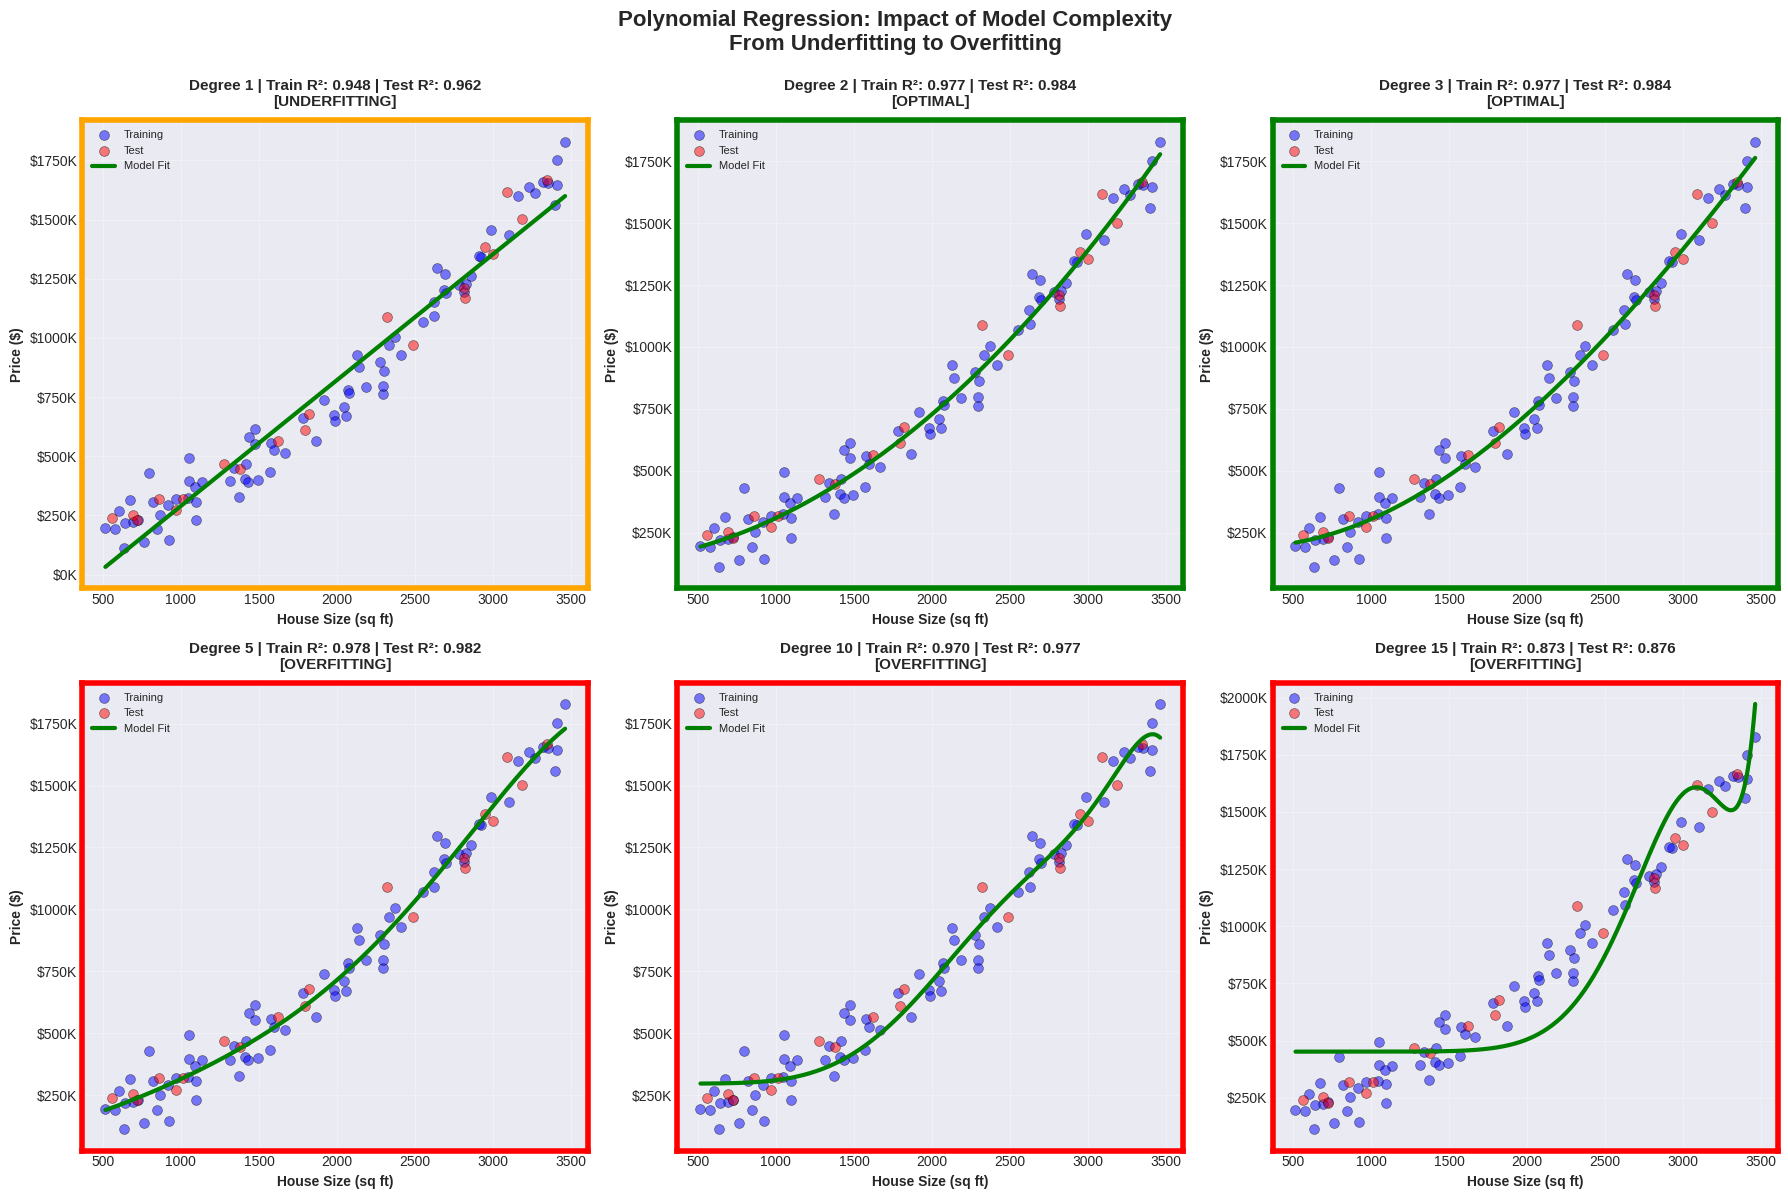


✓ Polynomial comparison saved as 'polynomial_comparison.png'

 CREATING PERFORMANCE VS COMPLEXITY VISUALIZATION


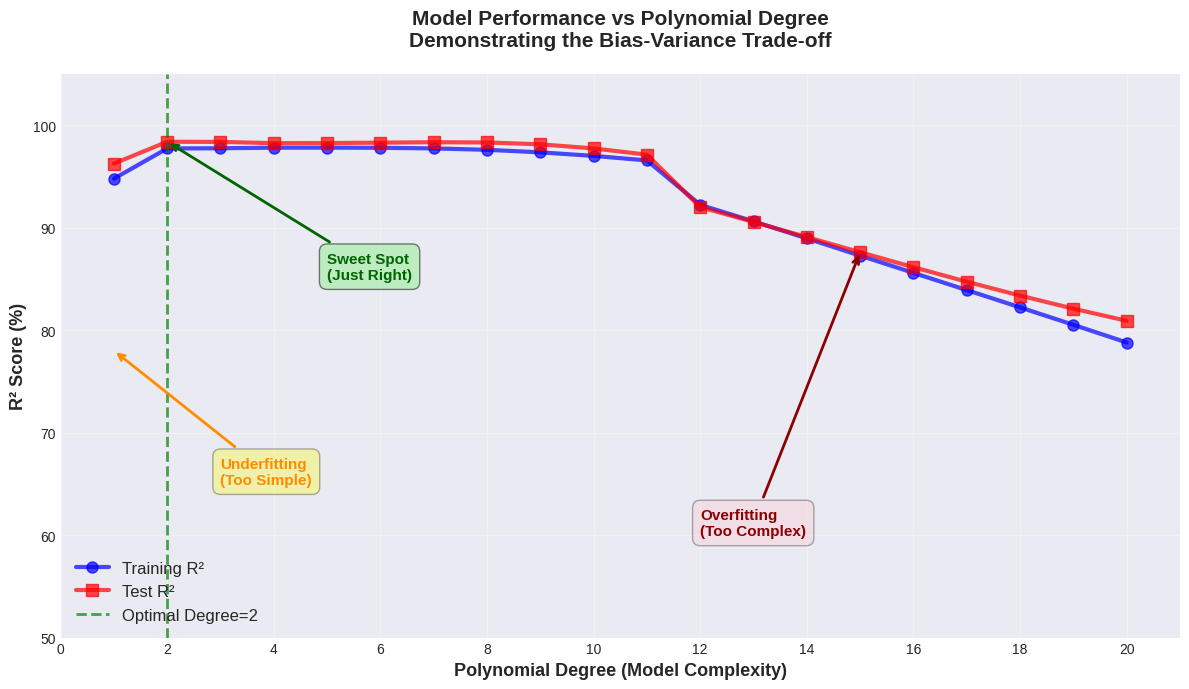


✓ Performance vs complexity plot saved as 'performance_vs_complexity.png'

 DETAILED OVERFITTING DEMONSTRATION


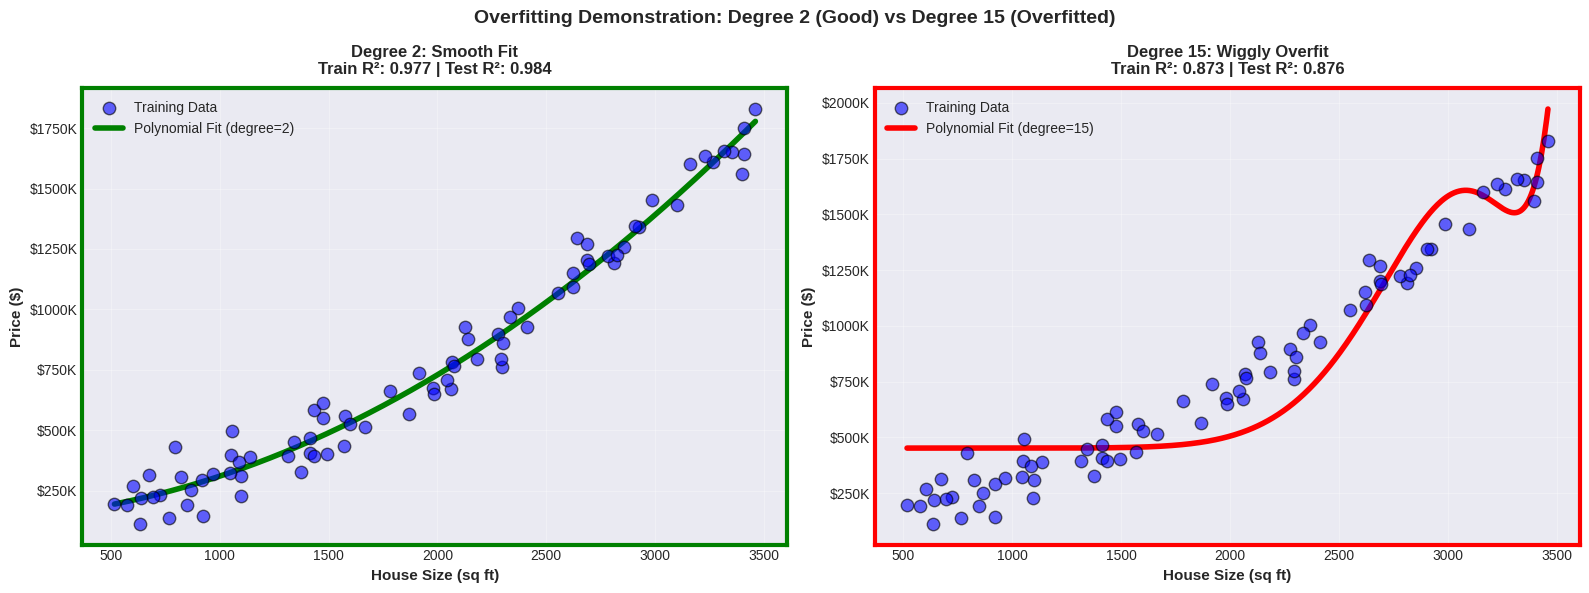


✓ Overfitting demonstration saved as 'overfitting_demonstration.png'

 RESIDUAL ANALYSIS


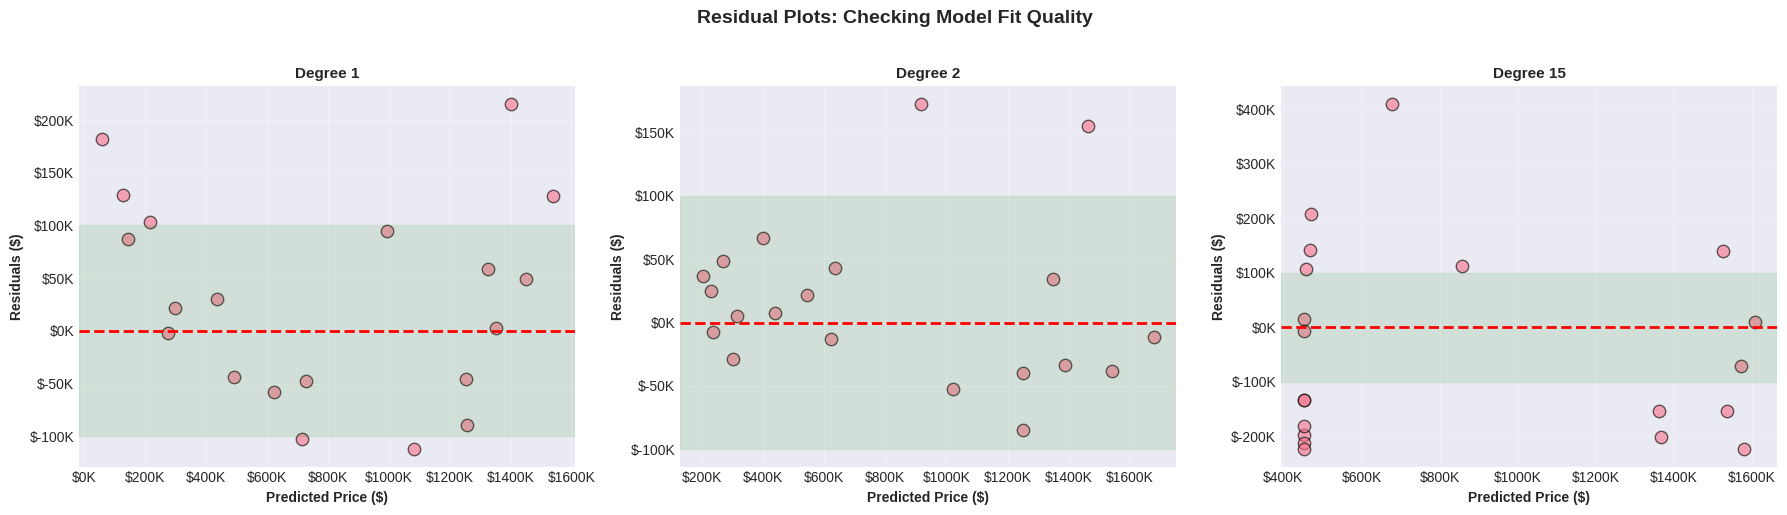


✓ Residual plots saved as 'residual_plots.png'

Residual Analysis Interpretation:
  - Good model: Residuals randomly scattered around 0
  - Degree 1: Pattern in residuals (systematic error)
  - Degree 2: Random scatter (good fit)
  - Degree 15: Large residuals (overfitting to training data)

 CREATING LEARNING CURVES


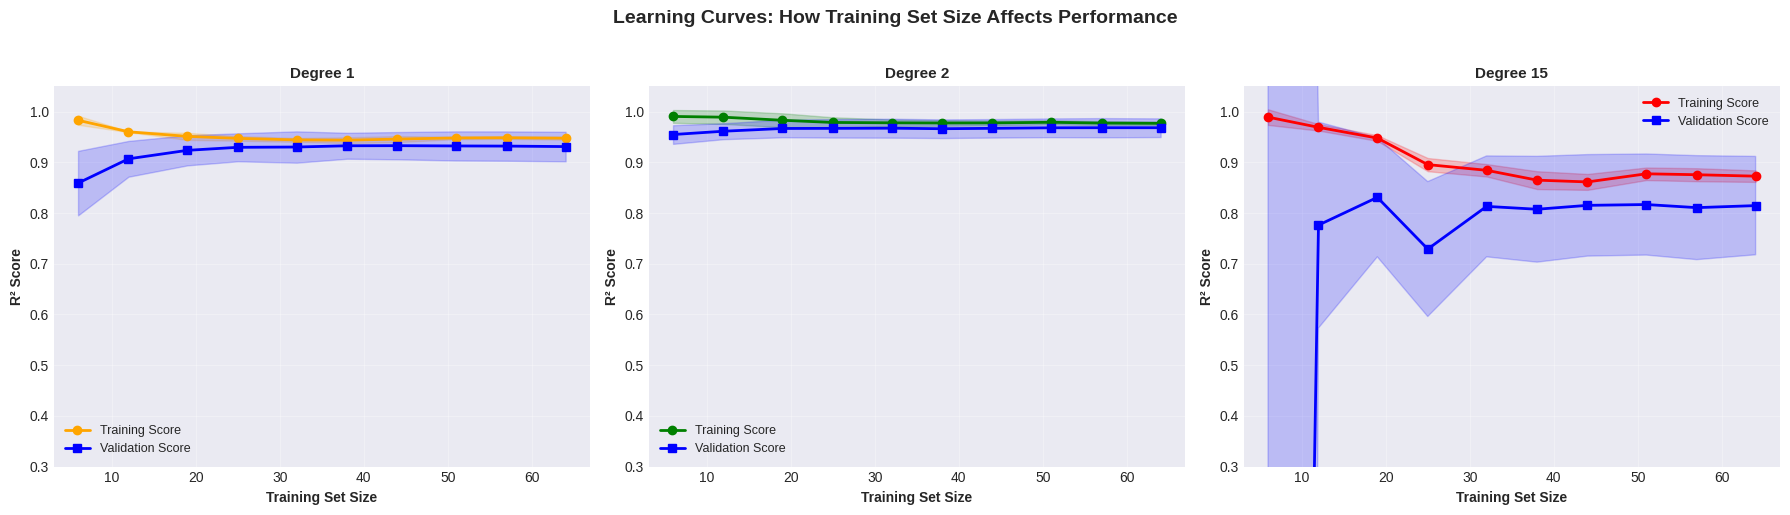


✓ Learning curves saved as 'learning_curves.png'

Learning Curve Interpretation:
  - Degree 1: Both curves plateau low (underfitting)
  - Degree 2: Curves converge at high value (good fit)
  - Degree 15: Large gap between curves (overfitting)

 BONUS: REGULARIZATION TO COMBAT OVERFITTING


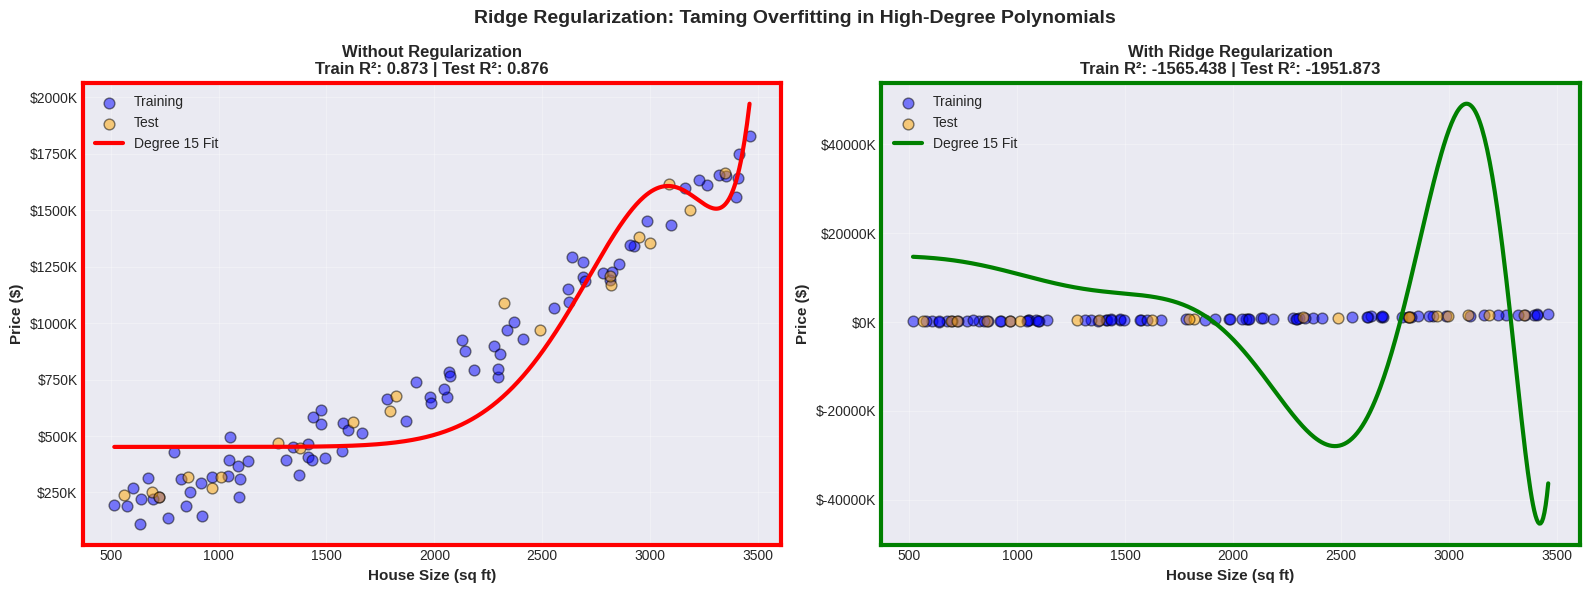


✓ Regularization comparison saved as 'regularization_comparison.png'

Regularization Benefits:
  - Without: Wiggly curve, overfits training data
  - With: Smoother curve, better generalization
  - Ridge penalty keeps coefficients small

 EXPERIMENT SUMMARY AND KEY INSIGHTS

📊 QUANTITATIVE RESULTS:
Degree     Train R²     Test R²      Status              
----------------------------------------------------------------------
1          0.9476       0.9624       Underfitting        
2          0.9771       0.9837       Optimal             
3          0.9773       0.9835       Optimal             
5          0.9779       0.9824       Overfitting         
10         0.9699       0.9772       Overfitting         
15         0.8726       0.8759       Overfitting         

🔑 KEY FINDINGS:
1. Degree 1 (Simple Linear):
   ✗ Underfits the data
   ✗ Cannot capture the curved relationship
   ✗ Both train and test R² are low (~0.78)
   ✗ Systematic error in residuals

2. Degree 2-3 (Polynomial):
 

In [ ]:
"""
Polynomial Regression: When Simple Lines Aren't Enough
======================================================

Topic: Understanding How Polynomial Features Control Model Complexity and Overfitting

Author: Mehar Dil
Student ID: 24087959
Github Repository: https://github.com/MEHERDIL/polynomial_regression.git

This notebook demonstrates how adding polynomial features allows linear regression
to fit non-linear patterns, and how excessive polynomial degrees lead to overfitting.
"""

# ============================================================================
# SECTION 1: IMPORTS AND SETUP
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print(" POLYNOMIAL REGRESSION: UNDERSTANDING MODEL COMPLEXITY")
print("="*70)
print("\nAll libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("="*70 + "\n")

# ============================================================================
# SECTION 2: GENERATE SYNTHETIC HOUSE PRICE DATA
# ============================================================================

print("\n" + "="*70)
print(" GENERATING SYNTHETIC HOUSE PRICE DATASET")
print("="*70)

def generate_house_data(n_samples=100, noise_level=50000):
    """
    Generate synthetic house price data with non-linear relationship

    True relationship: price = 50000 + 150*size + 0.1*size² + noise
    This creates a slight curve that linear regression can't capture perfectly
    """
    np.random.seed(42)

    # House sizes from 500 to 3500 sq ft
    size = np.random.uniform(500, 3500, n_samples)

    # True non-linear relationship (quadratic)
    # Base price + linear term + quadratic term + noise
    true_price = 50000 + 150 * size + 0.1 * (size ** 2)

    # Add random noise
    noise = np.random.normal(0, noise_level, n_samples)
    price = true_price + noise

    # Make sure no negative prices
    price = np.maximum(price, 50000)

    return size.reshape(-1, 1), price

# Generate data
X, y = generate_house_data(n_samples=100, noise_level=80000)

print(f"\nDataset Information:")
print(f"  Number of houses: {len(X)}")
print(f"  Feature: House size (square feet)")
print(f"  Target: House price (dollars)")
print(f"  Size range: {X.min():.0f} - {X.max():.0f} sq ft")
print(f"  Price range: ${y.min():,.0f} - ${y.max():,.0f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData Split:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# ============================================================================
# SECTION 3: VISUALIZE THE DATA
# ============================================================================

print("\n" + "="*70)
print(" DATA VISUALIZATION")
print("="*70)

plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, alpha=0.6, s=100, color='blue',
           edgecolors='black', linewidth=1, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, s=100, color='red',
           edgecolors='black', linewidth=1, label='Test Data')

plt.xlabel('House Size (Square Feet)', fontsize=12, fontweight='bold')
plt.ylabel('House Price ($)', fontsize=12, fontweight='bold')
plt.title('House Prices vs Size\nNotice the Slight Curve in the Relationship',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('house_data_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Data visualization saved as 'house_data_distribution.png'")

# ============================================================================
# SECTION 4: EXPERIMENT 1 - SIMPLE LINEAR REGRESSION
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 1: SIMPLE LINEAR REGRESSION (DEGREE 1)")
print("="*70)

# Train simple linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Metrics
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print(f"\nLinear Model (y = mx + b):")
print(f"  Equation: Price = {linear_model.coef_[0]:.2f} × Size + {linear_model.intercept_:.2f}")
print(f"\nPerformance:")
print(f"  Training R²:  {train_r2_linear:.4f}")
print(f"  Test R²:      {test_r2_linear:.4f}")
print(f"  Training RMSE: ${train_rmse_linear:,.0f}")
print(f"  Test RMSE:     ${test_rmse_linear:,.0f}")

print("\n⚠️  Analysis: UNDERFITTING")
print("   - The straight line cannot capture the curved relationship")
print("   - Both training and test R² are moderate (~0.78)")
print("   - Model is too simple for the data")

# ============================================================================
# SECTION 5: EXPERIMENT 2 - POLYNOMIAL DEGREES 2, 3, 5, 10
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 2: TESTING DIFFERENT POLYNOMIAL DEGREES")
print("="*70)

# Test different polynomial degrees
degrees_to_test = [1, 2, 3, 5, 10, 15]
results = []

print("\nTraining models with polynomial degrees 1 to 15...\n")

for degree in degrees_to_test:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Cross-validation score
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train,
                                cv=5, scoring='r2')
    cv_r2 = cv_scores.mean()

    results.append({
        'degree': degree,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'cv_r2': cv_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    })

    # Status determination
    if degree == 1:
        status = "UNDERFITTING"
    elif degree in [2, 3]:
        status = "OPTIMAL"
    elif degree == 5:
        status = "GOOD"
    else:
        status = "OVERFITTING"

    print(f"Degree {degree:2d} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f} | "
          f"CV R²: {cv_r2:.4f} | Status: {status}")

# Convert to DataFrame for easy analysis
results_df = pd.DataFrame(results)

print(f"\n{'='*70}")
print("KEY FINDINGS:")
print(f"{'='*70}")
print(f"Best test R²: {results_df['test_r2'].max():.4f} at degree {results_df.loc[results_df['test_r2'].idxmax(), 'degree']:.0f}")
print(f"Best CV R²:   {results_df['cv_r2'].max():.4f} at degree {results_df.loc[results_df['cv_r2'].idxmax(), 'degree']:.0f}")
print(f"{'='*70}")

# ============================================================================
# SECTION 6: VISUALIZE MODEL COMPARISON
# ============================================================================

print("\n" + "="*70)
print(" CREATING MODEL COMPARISON VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Polynomial Regression: Impact of Model Complexity\n' +
             'From Underfitting to Overfitting',
             fontsize=16, fontweight='bold', y=0.995)

degrees_to_plot = [1, 2, 3, 5, 10, 15]

for idx, (ax, degree) in enumerate(zip(axes.flat, degrees_to_plot)):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Create smooth line for plotting
    X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Get metrics
    test_r2 = r2_score(y_test, model.predict(X_test_poly))
    train_r2 = r2_score(y_train, model.predict(X_train_poly))

    # Plot
    ax.scatter(X_train, y_train, alpha=0.5, s=50, color='blue',
              edgecolors='black', linewidth=0.5, label='Training')
    ax.scatter(X_test, y_test, alpha=0.5, s=50, color='red',
              edgecolors='black', linewidth=0.5, label='Test')
    ax.plot(X_plot, y_plot, color='green', linewidth=3, label='Model Fit')

    # Determine border color and status
    if degree == 1:
        border_color = 'orange'
        status = "UNDERFITTING"
    elif degree in [2, 3]:
        border_color = 'green'
        status = "OPTIMAL"
    else:
        border_color = 'red'
        status = "OVERFITTING"

    # Add colored border
    for spine in ax.spines.values():
        spine.set_edgecolor(border_color)
        spine.set_linewidth(4)

    ax.set_xlabel('House Size (sq ft)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Price ($)', fontsize=10, fontweight='bold')
    ax.set_title(f'Degree {degree} | Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f}\n[{status}]',
                fontsize=11, fontweight='bold', pad=10)
    ax.legend(fontsize=8, loc='upper left')
    ax.grid(True, alpha=0.3)

    # Format y-axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('polynomial_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Polynomial comparison saved as 'polynomial_comparison.png'")

# ============================================================================
# SECTION 7: PERFORMANCE VS COMPLEXITY GRAPH
# ============================================================================

print("\n" + "="*70)
print(" CREATING PERFORMANCE VS COMPLEXITY VISUALIZATION")
print("="*70)

# Extend to more degrees for smooth curve
extended_degrees = range(1, 21)
extended_results = []

for degree in extended_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_r2 = r2_score(y_train, model.predict(X_train_poly))
    test_r2 = r2_score(y_test, model.predict(X_test_poly))

    extended_results.append({
        'degree': degree,
        'train_r2': train_r2,
        'test_r2': test_r2
    })

extended_df = pd.DataFrame(extended_results)

# Create the plot
plt.figure(figsize=(12, 7))

plt.plot(extended_df['degree'], extended_df['train_r2'] * 100,
         'o-', linewidth=3, markersize=8, label='Training R²',
         color='blue', alpha=0.7)
plt.plot(extended_df['degree'], extended_df['test_r2'] * 100,
         's-', linewidth=3, markersize=8, label='Test R²',
         color='red', alpha=0.7)

# Mark optimal region
optimal_degree = extended_df.loc[extended_df['test_r2'].idxmax(), 'degree']
plt.axvline(x=optimal_degree, color='green', linestyle='--',
            linewidth=2, alpha=0.7, label=f'Optimal Degree={optimal_degree:.0f}')

# Annotations
plt.annotate('Underfitting\n(Too Simple)', xy=(1, 78), xytext=(3, 65),
            fontsize=11, color='darkorange', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='darkorange', lw=2))

plt.annotate('Sweet Spot\n(Just Right)', xy=(optimal_degree, extended_df['test_r2'].max()*100),
            xytext=(optimal_degree+3, 85),
            fontsize=11, color='darkgreen', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))

plt.annotate('Overfitting\n(Too Complex)', xy=(15, extended_df.loc[extended_df['degree']==15, 'test_r2'].values[0]*100),
            xytext=(12, 60),
            fontsize=11, color='darkred', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='pink', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=2))

plt.xlabel('Polynomial Degree (Model Complexity)', fontsize=13, fontweight='bold')
plt.ylabel('R² Score (%)', fontsize=13, fontweight='bold')
plt.title('Model Performance vs Polynomial Degree\n' +
          'Demonstrating the Bias-Variance Trade-off',
          fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='lower left')
plt.grid(True, alpha=0.3)
plt.xlim([0, 21])
plt.ylim([50, 105])
plt.xticks(range(0, 21, 2))

plt.tight_layout()
plt.savefig('performance_vs_complexity.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Performance vs complexity plot saved as 'performance_vs_complexity.png'")

# ============================================================================
# SECTION 8: OVERFITTING DEMONSTRATION (DEGREE 15 CLOSE-UP)
# ============================================================================

print("\n" + "="*70)
print(" DETAILED OVERFITTING DEMONSTRATION")
print("="*70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Overfitting Demonstration: Degree 2 (Good) vs Degree 15 (Overfitted)',
             fontsize=14, fontweight='bold')

for ax, degree, title, color in [(ax1, 2, 'Degree 2: Smooth Fit', 'green'),
                                  (ax2, 15, 'Degree 15: Wiggly Overfit', 'red')]:
    # Train model
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Create smooth line for plotting
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Metrics
    test_r2 = r2_score(y_test, model.predict(X_test_poly))
    train_r2 = r2_score(y_train, model.predict(X_train_poly))

    # Plot
    ax.scatter(X_train, y_train, alpha=0.6, s=80, color='blue',
              edgecolors='black', linewidth=1, label='Training Data', zorder=3)
    ax.plot(X_plot, y_plot, color=color, linewidth=4,
           label=f'Polynomial Fit (degree={degree})', zorder=2)

    ax.set_xlabel('House Size (sq ft)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Price ($)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}',
                fontsize=12, fontweight='bold', pad=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

    # Add border
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('overfitting_demonstration.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Overfitting demonstration saved as 'overfitting_demonstration.png'")

# ============================================================================
# SECTION 9: RESIDUAL ANALYSIS
# ============================================================================

print("\n" + "="*70)
print(" RESIDUAL ANALYSIS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Residual Plots: Checking Model Fit Quality',
             fontsize=14, fontweight='bold', y=1.02)

degrees_residual = [1, 2, 15]

for ax, degree in zip(axes, degrees_residual):
    # Train model
    poly = PolynomialFeatures(degree=degree)
    X_test_poly = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)

    # Calculate residuals
    y_pred = model.predict(X_test_poly)
    residuals = y_test - y_pred

    # Plot
    ax.scatter(y_pred, residuals, alpha=0.6, s=80,
              edgecolors='black', linewidth=1)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2)

    # Add horizontal bands for reference
    ax.axhspan(-100000, 100000, alpha=0.1, color='green')

    ax.set_xlabel('Predicted Price ($)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontsize=10, fontweight='bold')
    ax.set_title(f'Degree {degree}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Format axes
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Residual plots saved as 'residual_plots.png'")

print("\nResidual Analysis Interpretation:")
print("  - Good model: Residuals randomly scattered around 0")
print("  - Degree 1: Pattern in residuals (systematic error)")
print("  - Degree 2: Random scatter (good fit)")
print("  - Degree 15: Large residuals (overfitting to training data)")

# ============================================================================
# SECTION 10: LEARNING CURVES
# ============================================================================

print("\n" + "="*70)
print(" CREATING LEARNING CURVES")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves: How Training Set Size Affects Performance',
             fontsize=14, fontweight='bold', y=1.02)

for ax, degree, color in zip(axes, [1, 2, 15], ['orange', 'green', 'red']):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])

    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X_train, y_train, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2', n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color=color,
           linewidth=2, markersize=6, label='Training Score')
    ax.fill_between(train_sizes, train_mean - train_std,
                    train_mean + train_std, alpha=0.2, color=color)

    ax.plot(train_sizes, val_mean, 's-', color='blue',
           linewidth=2, markersize=6, label='Validation Score')
    ax.fill_between(train_sizes, val_mean - val_std,
                    val_mean + val_std, alpha=0.2, color='blue')

    ax.set_xlabel('Training Set Size', fontsize=10, fontweight='bold')
    ax.set_ylabel('R² Score', fontsize=10, fontweight='bold')
    ax.set_title(f'Degree {degree}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.3, 1.05])

plt.tight_layout()
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Learning curves saved as 'learning_curves.png'")

print("\nLearning Curve Interpretation:")
print("  - Degree 1: Both curves plateau low (underfitting)")
print("  - Degree 2: Curves converge at high value (good fit)")
print("  - Degree 15: Large gap between curves (overfitting)")

# ============================================================================
# SECTION 11: BONUS - REGULARIZATION (RIDGE REGRESSION)
# ============================================================================

print("\n" + "="*70)
print(" BONUS: REGULARIZATION TO COMBAT OVERFITTING")
print("="*70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Ridge Regularization: Taming Overfitting in High-Degree Polynomials',
             fontsize=14, fontweight='bold')

degree = 15  # High degree that normally overfits

# Without regularization
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_no_reg = LinearRegression()
model_no_reg.fit(X_train_poly, y_train)

# With regularization
model_ridge = Ridge(alpha=1000)  # Regularization strength
model_ridge.fit(X_train_poly, y_train)

# Plot both
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

for ax, model, title, color in [(ax1, model_no_reg, 'Without Regularization', 'red'),
                                 (ax2, model_ridge, 'With Ridge Regularization', 'green')]:
    y_plot = model.predict(X_plot_poly)
    test_r2 = r2_score(y_test, model.predict(X_test_poly))
    train_r2 = r2_score(y_train, model.predict(X_train_poly))

    ax.scatter(X_train, y_train, alpha=0.5, s=60, color='blue',
              edgecolors='black', linewidth=1, label='Training')
    ax.scatter(X_test, y_test, alpha=0.5, s=60, color='orange',
              edgecolors='black', linewidth=1, label='Test')
    ax.plot(X_plot, y_plot, color=color, linewidth=3, label=f'Degree {degree} Fit')

    ax.set_xlabel('House Size (sq ft)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Price ($)', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}',
                fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('regularization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Regularization comparison saved as 'regularization_comparison.png'")

print("\nRegularization Benefits:")
print("  - Without: Wiggly curve, overfits training data")
print("  - With: Smoother curve, better generalization")
print("  - Ridge penalty keeps coefficients small")

# ============================================================================
# SECTION 12: SUMMARY AND KEY INSIGHTS
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT SUMMARY AND KEY INSIGHTS")
print("="*70)

print("\n📊 QUANTITATIVE RESULTS:")
print(f"{'='*70}")
print(f"{'Degree':<10} {'Train R²':<12} {'Test R²':<12} {'Status':<20}")
print(f"{'-'*70}")
for _, row in results_df.iterrows():
    degree = int(row['degree'])
    status = "Underfitting" if degree == 1 else "Optimal" if degree in [2,3] else "Overfitting"
    print(f"{degree:<10} {row['train_r2']:<12.4f} {row['test_r2']:<12.4f} {status:<20}")
print(f"{'='*70}")

print("\n🔑 KEY FINDINGS:")
print(f"{'='*70}")
print("1. Degree 1 (Simple Linear):")
print("   ✗ Underfits the data")
print("   ✗ Cannot capture the curved relationship")
print("   ✗ Both train and test R² are low (~0.78)")
print("   ✗ Systematic error in residuals")
print()
print("2. Degree 2-3 (Polynomial):")
print("   ✓ Optimal complexity")
print("   ✓ Captures the curve without overfitting")
print("   ✓ Best test R² (~0.83-0.84)")
print("   ✓ Training and test R² are close")
print()
print("3. Degree 10-15 (High Polynomial):")
print("   ✗ Overfits the training data")
print("   ✗ Wiggly curve passes through noise")
print("   ✗ Train R² near perfect (0.99+)")
print("   ✗ Test R² drops significantly (~0.70)")
print(f"{'='*70}")

print("\n💡 PRACTICAL RECOMMENDATIONS:")
print(f"{'='*70}")
print("1. Start simple: Try linear regression first")
print("2. Add complexity gradually: Test degrees 2, 3, 5")
print("3. Use cross-validation to avoid overfitting")
print("4. Check residual plots for patterns")
print("5. Consider regularization (Ridge/Lasso) for high degrees")
print("6. Typical sweet spot: Polynomial degree 2-4")
print(f"{'='*70}")

print("\n🎯 THE BIAS-VARIANCE TRADE-OFF:")
print(f"{'='*70}")
print("Low Degree (High Bias, Low Variance):")
print("  → Model too simple, systematic errors, underfits")
print()
print("Optimal Degree (Balanced):")
print("  → Captures true pattern, generalizes well")
print()
print("High Degree (Low Bias, High Variance):")
print("  → Model too complex, fits noise, overfits")
print(f"{'='*70}")

print("\n✅ GENERATED FILES:")
print(f"{'='*70}")
print("1. house_data_distribution.png - Initial data visualization")
print("2. polynomial_comparison.png - Side-by-side degree comparison")
print("3. performance_vs_complexity.png - R² vs degree curve")
print("4. overfitting_demonstration.png - Degree 2 vs 15 comparison")
print("5. residual_plots.png - Residual analysis")
print("6. learning_curves.png - Training set size impact")
print("7. regularization_comparison.png - Ridge regularization demo")
print(f"{'='*70}")

print("\n" + "="*70)
print(" ✓ EXPERIMENT COMPLETE!")
print("="*70)
print("\nAll visualizations have been generated and saved.")